In [1]:
import os
import tiktoken
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from dotenv import load_dotenv
from openai.embeddings_utils import cosine_similarity
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [2]:
from dotenv import load_dotenv
load_dotenv()
import openai

In [3]:
# df = pd.read_csv('./data/data_science_jobs_indeed_usa.csv')

In [4]:
# encoding = tiktoken.get_encoding('cl100k_base')

In [5]:
# df = df.assign(token_count=df['Description'].apply(lambda x: len(encoding.encode(x))))

In [6]:
# print(df.shape)
# df.head()

(1200, 11)


,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token_count
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,26
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,25
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,10
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,29
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,28


In [3]:
# Azure: 
# @retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(10))
# def get_embedding(text) -> list[float]:
#     text = text.replace("\n", " ")
#     return openai.Embedding.create(input=text, engine=OpenAiEmbedding)["data"][0]["embedding"]

@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(10))
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return openai.Embedding.create(input = [text], model=model)['data'][0]['embedding']

In [8]:
# df = df.assign(embedding=df['Description'].apply(lambda x: get_embedding(x, model='text-embedding-ada-002')))

In [9]:
# df.to_parquet("job_descriptions_with_embeddings.parquet")

In [4]:
df = pd.read_parquet("job_descriptions_with_embeddings.parquet")

In [5]:
df.head()

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token_count,embedding
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,None,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,26,"[-0.0194996390491724, -0.0041993726044893265, ..."
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,25,"[-0.012073525227606297, -0.026480479165911674,..."
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,None,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,10,"[-0.021908748894929886, -0.002960818586871028,..."
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,29,"[-0.017482835799455643, -0.01076465379446745, ..."
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,28,"[0.0011034636991098523, -0.000915585900656879,..."


In [6]:
X = np.vstack(df.embedding.values)

In [7]:
df.head(2)

,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token_count,embedding
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,None,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,26,"[-0.0194996390491724, -0.0041993726044893265, ..."
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,25,"[-0.012073525227606297, -0.026480479165911674,..."


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['kmeans_label'] = kmeans.fit_predict(X)

In [9]:
print(df.shape)
df.head(2)

(1200, 13)


,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token_count,embedding,kmeans_label
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,None,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,26,"[-0.0194996390491724, -0.0041993726044893265, ...",2
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,25,"[-0.012073525227606297, -0.026480479165911674,...",3


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from langchain import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)


def get_prompt():
    system_template = "You're an expert journalist. You're helping me write a compelling topic title for news articles."
    human_template = "Using the following articles, write a topic title that summarizes them.\n\nARTICLES:{articles}\n\nTOPIC TITLE:"

    return ChatPromptTemplate(
        messages=[
            SystemMessagePromptTemplate.from_template(system_template),
            HumanMessagePromptTemplate.from_template(human_template),
        ],
        input_variables=["articles"],
    )

# Maximum number of tokens that can be processed at once
max_tokens = 4096

# Average number of tokens per paragraph
avg_tokens_per_paragraph = 100

# Maximum number of paragraphs that can be processed at once
max_paragraphs = max_tokens // avg_tokens_per_paragraph

for c in df.kmeans_label.unique():
    chain = LLMChain(
        llm=ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo"), prompt=get_prompt(), verbose=False
    )
    articles = df.query(f"kmeans_label == {c}").to_dict(orient="records")

    
    # Process the articles in chunks
    results = []
    for i in range(0, len(articles), max_paragraphs):
        chunk = articles[i:i+max_paragraphs]
        articles_str = "\n".join([article['Description'] for article in chunk])
        result = chain.run(
            {
                "articles": articles_str,
            }
        )
        results.append(result)
        # Assign the generated topic title to each article in the chunk
        for article in chunk:
            df.loc[df.Description == article['Description'], "topic_title"] = result


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 1.0 seconds as it raised ServiceUnavailableError: The server is overloaded or not ready yet..


In [13]:
df[df['kmeans_label']==0]['topic_title'].value_counts()

topic_title
"Expertise in Database Management: SQL Server DBA, Performance Monitoring, and Administration"    42
"Database Administrators: Enhancing Performance, Security, and Efficiency"                        41
"Optimizing Database Performance: A Comprehensive Guide for Administrators and Developers"        37
"Expert Database Administrator with Extensive Experience in SQL, Oracle, and AWS Technologies"    30
Name: count, dtype: int64

In [42]:
from llama_index.llms import OpenAI
from langchain.embeddings import OpenAIEmbeddings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random


class ClusterTopicIdentifier:
    def __init__(self, dataframe, text_col='text', cluster_col='cluster', engine="gpt-3.5-turbo"):
        self.dataframe = dataframe
        self.text_col = text_col
        self.cluster_col = cluster_col
        self.engine = engine
        self.llm = OpenAI(model=engine, temperature=0)
        self.embed_model = OpenAIEmbeddings()

    def get_topic_label(self, text_samples): 
        prompt = "Given the following text samples, provide a concise topic label:\n\n"+"\n".join(text_samples)
        response = self.llm.complete(prompt, max_tokens=50)
        return str(response)

    def measure_similarity(self, topic_labels):
        topic_vectors = self.embed_model.embed_documents(topic_labels)
        vectors = np.vstack(topic_vectors)
        csim = cosine_similarity(vectors)
        return np.mean(csim)

    def identify_topics(self, num_samples=5, sample_size=10):
        clusters = self.dataframe[self.cluster_col].unique()
        results = []
        for cluster in clusters:
            texts = self.dataframe[self.dataframe[self.cluster_col] == cluster][self.text_col].tolist()
            topic_labels = []
            for _ in range(num_samples):
                text_samples = random.sample(texts, min(sample_size, len(texts)))
                topic_labels.append(self.get_topic_label(text_samples))
            similarity = self.measure_similarity(topic_labels)
            results.append([cluster, topic_labels, similarity])
        result_df = pd.DataFrame(results, columns=['Cluster', 'Topic Labels', 'Similarity'])
        result_df = result_df.explode('Topic Labels').reset_index(drop=True)
        return result_df

    def visualize_runs(self, result_df):
        for i, row in result_df.iterrows():
            cluster = row['Cluster']
            topic_labels = row['Topic Labels']

            # Compute similarity matrix
            topic_vectors = self.embed_model.embed_documents(topic_labels)
            vectors = np.vstack(topic_vectors)
            similarity_matrix = cosine_similarity(vectors)

            # Create a histogram
            plt.figure(figsize=(10, 8))
            sns.histplot(similarity_matrix.flatten(), kde=True, bins=20)
            plt.title(f'Histogram of Topic Label Similarities for Cluster {cluster}')
            plt.xlabel('Similarity Score')
            plt.ylabel('Frequency')
            plt.show()

In [43]:
# Initialize the class with the toy dataset
cluster_identifier = ClusterTopicIdentifier(df, text_col='Description', cluster_col='kmeans_label')

# Identify topics for each cluster
result_df  = cluster_identifier.identify_topics(num_samples=10)

In [47]:
result_df[result_df['Cluster']==3]

,Cluster,Topic Labels,Similarity
10,3,Business Analysis and Requirements Gathering,0.892718
11,3,Business Analysis and Requirements Gathering f...,0.892718
12,3,Business Intelligence and Reporting,0.892718
13,3,Business Intelligence and Agile Project Manage...,0.892718
14,3,"Business Analysis, Enablement Metrics, Archite...",0.892718
15,3,Business Intelligence Analyst\nData Analysis\n...,0.892718
16,3,Business Intelligence Developer,0.892718
17,3,Business Analysis and Requirements Gathering,0.892718
18,3,Business Intelligence Solutions,0.892718
19,3,Business Analysis and Business Intelligence,0.892718


In [15]:
result_df.groupby('Cluster').mean('Similarity')

,Similarity
Cluster,
0,0.854110
1,0.851322
2,0.843315
3,0.820402


In [ ]:
assert 1 + 1 == 3

AssertionError: 

In [17]:
import asyncio
import lmql

In [18]:
@lmql.query
async def hello():
    '''lmql
    argmax
        "Hello[WHO]"
        return WHO
    from
        "openai/text-ada-001"
    where
        len(TOKENS(WHO)) < 10
    '''

# run 10 instances of 'hello' in parallel
await asyncio.gather(*[hello() for _ in range(10)])

[['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.'],
 ['\n\nHello, welcome to our website.']]

In [19]:
@lmql.query
async def explain(dad_joke):
   '''lmql
   argmax
   """Explain the dad joke: {dad_joke}
   Explanation: [EXPLANATION]"""
   from
   "openai/text-davinci-003"
   '''

In [20]:
result = await explain("""My dad quit his job to pursue his dream in archeology.

His career is now in ruins.""")

In [21]:
print(result[0].prompt)

Explain the dad joke: My dad quit his job to pursue his dream in archeology.

His career is now in ruins.
Explanation: 
This is a pun on the word "ruins," which can refer to both the remains of an ancient civilization and a situation that has been destroyed or ruined. The joke is that by quitting his job to pursue his dream in archeology, his career has been "ruined" or destroyed.


In [22]:
print(result[0].variables['EXPLANATION'])


This is a pun on the word "ruins," which can refer to both the remains of an ancient civilization and a situation that has been destroyed or ruined. The joke is that by quitting his job to pursue his dream in archeology, his career has been "ruined" or destroyed.


In [87]:
@lmql.query
async def classify_review(review):
  '''argmax
    """Review: {review}\n
    Q: What is the underlying sentiment of this review and why?\n
    A:[ANALYSIS]\n
    Based on this, the overall sentiment of the message can be considered to be [CLASSIFICATION]"""
  from
    "openai/text-davinci-003"
  WHERE
    CLASSIFICATION in ["positive", "neutral", "negative"]
  '''

In [88]:
result = await classify_review("""Schweinsbraten schlecht, Kässpatzen ohne Geschmack mit blassen nicht krossen Röstzwiebeln.
Der Kaiserschmarren war dann der  Gipfel , in 5 Min fertig und  einfach nur mies !!!!
Alles in Allem eine Frechheit!!!!

Nie wieder!!!!!!""")

In [89]:
result[0].variables

{'ANALYSIS': ' The underlying sentiment of this review is one of extreme dissatisfaction. The reviewer is very unhappy with the quality of the food, describing the Schweinsbraten as "schlecht" (bad), the Kässpatzen as having "ohne Geschmack" (no taste) and the Kaiserschmarren as "mies" (awful). The reviewer expresses their dissatisfaction by saying "Alles in Allem eine Frechheit!" (All in all, a disgrace!) and concludes with "Nie wieder!" (Never again!).',
 'CLASSIFICATION': 'negative'}

In [90]:
df = pd.DataFrame([r.variables for r in result])
df

,ANALYSIS,CLASSIFICATION
0,The underlying sentiment of this review is on...,negative


In [139]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

In [27]:

from llama_index import SimpleDirectoryReader

documents_ho3 = SimpleDirectoryReader(input_files=['./data/HO3_sample.pdf']).load_data()

In [28]:
docs = []

for i in range(len(documents_ho3)):
    doc = documents_ho3[i].to_langchain_format()
    docs.append(doc)

In [30]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

embeddings = OpenAIEmbeddings()
docsearch = Chroma.from_documents(docs, embeddings, persist_directory="lmql-index")

In [31]:
@lmql.query
async def chatbot():
        '''lmql
sample(temperature=0.2, max_len=2048, openai_chunksize=2048)
    """You are a chatbot that helps users answer questions.
    You are first provided with the question and relevant information."""
    while True:
        q = await input("\nQuestion: ")
        if q == "exit": break
        "Question: {q}\n"
        print("Reading relevant pages...")
        results = set([d.page_content for d in docsearch.similarity_search(q, 4)])
        information = "\n\n".join(["..." + r + "..." for r in list(results)])
        "\nRelevant Information: {information}\n"
        "Your response based on relevant information:[RESPONSE]"
from
    "openai/gpt-3.5-turbo"
        '''

In [32]:
# setup the LM to be used by langchain
from langchain import PromptTemplate


llm = OpenAI(temperature=0.9)

human_message_prompt = HumanMessagePromptTemplate(
        prompt=PromptTemplate(
            template="What is a good name for a company that makes {product}?",
            input_variables=["product"],
        )
    )
chat_prompt_template = ChatPromptTemplate.from_messages([human_message_prompt])
chat = ChatOpenAI(temperature=0.9)
chain = LLMChain(llm=chat, prompt=chat_prompt_template)

In [33]:
chain.run("fake dog poop")

'Faux Paws Productions'

In [34]:
@lmql.query
async def write_catch_phrase(company_name: str):
    '''
    argmax "Write a catchphrase for the following company: {company_name}. [catchphrase]" from "chatgpt"
    '''

In [37]:
(await write_catch_phrase("Socks Inc"))[0].variables["catchphrase"]

'  "Step up your style with Socks Inc. - where comfort meets fashion!"'

In [38]:
from langchain.chains import SimpleSequentialChain
overall_chain = SimpleSequentialChain(chains=[chain, write_catch_phrase.aschain()], verbose=True)

In [98]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.node_parser import SimpleNodeParser
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=512)
parser = SimpleNodeParser(text_splitter=splitter)
nodes = parser.get_nodes_from_documents(documents_ho3)

In [99]:
service_context = ServiceContext.from_defaults(chunk_size_limit=512)

In [100]:
index = VectorStoreIndex(nodes, service_context=service_context)

In [101]:
from llama_index import get_response_synthesizer
from llama_index.indices.vector_store.retrievers import VectorIndexRetriever
from llama_index.query_engine.retriever_query_engine import RetrieverQueryEngine

retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=2)

In [102]:
response = retriever.retrieve("water damage")

In [103]:
len(response[0].node.text)

401

In [104]:
response[0].node.get_content()

'only for the ensuing loss.\nThis Exclusion A.2. does not apply to loss by\ntheft.\n3. Water Damage\nWater Damage means:\na.Flood, surface water, waves, tidal water,\noverflow of a body of water, or spray fromany of these, whether or not driven by wind;\nb.Water or water-borne material which backsup through sewers or drains or which over-flows or is discharged from a sump, sumppump or related equipment; or'

In [105]:
information = "\n\n".join([s.node.get_content() for s in response])

In [106]:
len(information)

887

In [107]:
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=4)

@lmql.query
async def index_query(question: str):
        '''
sample(temperature=0.2, max_len=2048, openai_chunksize=2048)
    """You are a QA bot that helps users answer questions."""
    response = retriever.retrieve(question)
    information = "\n\n".join([s.node.get_content() for s in response])
    "Question: {question}\n"
    "\nRelevant Information: {information}\n"
    "Your response based on relevant information:[RESPONSE]"
from
    "openai/gpt-3.5-turbo"
        '''

In [108]:
result = await index_query("Does the policy cover water damage?", output_writer=lmql.stream(variable="RESPONSE"))

Yes, the policy does cover water damage. Loss by water covered under c.(5) and (6) is not excluded, and any ensuing loss to property described in Coverages A and B is covered, as long as it is not precluded by any other provision in the policy.

In [109]:
result[0].variables

{'RESPONSE': '  Yes, the policy does cover water damage. Loss by water covered under c.(5) and (6) is not excluded, and any ensuing loss to property described in Coverages A and B is covered, as long as it is not precluded by any other provision in the policy.'}

In [110]:
df = pd.DataFrame([r.variables for r in result])
df

,RESPONSE
0,"Yes, the policy does cover water damage. Los..."


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(df['embedding'].to_list())
df = df.assign(cluster=kmeans.labels_)
df.head()

c:\Users\pdoub\Desktop\python_projects\junk-drawer\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions,token_count,embedding,cluster
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...,26,"[-0.0194996390491724, -0.0041993726044893265, ...",2
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...,25,"[-0.012073525227606297, -0.026480479165911674,...",4
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...,10,"[-0.021908748894929886, -0.002960818586871028,...",4
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...,29,"[-0.017482835799455643, -0.01076465379446745, ...",7
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...,28,"[0.0011398864444345236, -0.0008925285073928535...",0


In [ ]:
df.Title.nunique()

566

(1200, 1536)


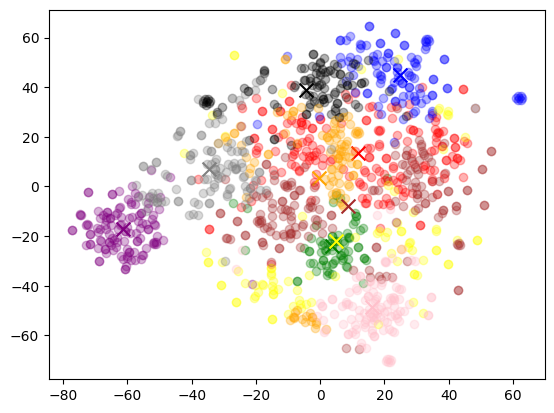

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
    n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
)

matrix = np.vstack(df.embedding.values)
print(matrix.shape)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue","yellow", 'black', 'orange', 'brown', 'pink', 'grey']):
    xs = np.array(x)[df.cluster == category]
    ys = np.array(y)[df.cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

In [ ]:
# take 10 samples from each cluster and write a prompt that asks what these have in common
# ideally you would use more than 10, but this is just a demo
for i in range(n_clusters):
    reviews = df[df['cluster'] == i]['Description'].sample(10)
    reviews = "\n".join(reviews.values.tolist())
    
    prompt = f"Here are 10 job descriptions:\n{reviews}Write a 3 to 5 word topic reflecting what these have in common."
    #print(prompt)
    response = openai.Completion.create(model="text-davinci-003", prompt=prompt, temperature=0.15, max_tokens=100, top_p=1, frequency_penalty=0, presence_penalty=0, stop=None)['choices'][0]['text'].strip()
    print(f"Cluster {i} topics: {response}")
    jobs = df[df['cluster'] == i]['Title'].sample(25)
    print(f"Jobs from cluster {i}: {', '.join(jobs.values.tolist())}")
    print("================")

Cluster 0 topics: Database Administration.
Jobs from cluster 0: Database Administrator, Database Administrator (Direct Hire/Remote), Database Administrator - Oracle (100% Remote), Oracle Database Administrator, Database Administrator, Database Administrator, Database Administrator II, DATABASE ADMINISTRATOR- SQL SERVER- CLT/REMOTE, SQL Server Database Administrator II - (Remote from anywhere in CO), Database Administrator, DATABASE ADMINISTRATOR, Database Administrator, Database Administrator 2, Database Administrator - Open to 100% Remote, Junior SQL Server Database Administrator, Database Administrator, IT Database Administrator / Senior Administrator, Database Administrator, Database Specialist, SQL Server/Db2 Database Administrator, Jr. SQL Database Administrator, Database Administrator, Database Administrator 5, SQL Database Administrator, Database Administrator
Cluster 1 topics: Business Intelligence Tools.
Jobs from cluster 1: Junior Developer – Business Intelligence (ETL), Busi

In [ ]:
ds_job = "Data Scientist"

# get embedding for movie
e = df[df['Title'] == ds_job]['embedding'].values[0]

# get cosine similarity between movie and all other movies and sort ascending
similarities = df['embedding'].apply(lambda x: cosine_similarity(x, e))

# get most similar movies
movies = df.assign(similarity=similarities).sort_values(by='similarity', ascending=False)[['Title', 'similarity', 'Description']]
movies[1:10]

,Title,similarity,Description
763,"Manager, Data Science & Analytics, Central Ana...",0.915978,"You will collaborate with data engineers, data..."
1130,"Manager, Data Science",0.908001,You will work to develop data science solution...
77,Data Scientist,0.902445,You will be a member of a multidisciplinary te...
1159,Data Scientist,0.902279,You will be a member of a multidisciplinary te...
236,"Senior Software Development Engineer, Big Data",0.900152,"Collaborate with engineers, product managers, ..."
354,Data Scientist,0.897500,"Work closely with analysts, traders, developer..."
149,Data Scientist,0.895616,You'll work closely with other data scientists...
326,Data Science Lead,0.890732,"As a Lead, you will be leading and growing a t..."
398,Data Engineer,0.886443,Collaborate with data analysts/scientists and ...


In [ ]:
from llama_index import SimpleDirectoryReader, ServiceContext, KnowledgeGraphIndex, StorageContext
from llama_index.graph_stores import SimpleGraphStore
from llama_index.llms import OpenAI
from IPython.display import Markdown, display

In [ ]:
from pathlib import Path

documents = SimpleDirectoryReader(input_files=['./data/HO3_sample.pdf']).load_data()

In [ ]:
llm=OpenAI(temperature=0, model_name="gpt-4")
service_context = ServiceContext.from_defaults(llm=llm, chunk_size_limit=512)

graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

In [ ]:
index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=10,
    storage_context=storage_context,
    service_context=service_context,
    include_embeddings=True
)

index.set_index_id("ho3_kg_index")
index.storage_context.persist(persist_dir="./ho3_kg_index")

In [ ]:
index.storage_context.persist(persist_dir="./ho3_kgraph_index.json")

In [ ]:
query_engine = index.as_query_engine(
    include_text=True,
    response_mode="tree_summarize",
    embedding_mode="hybrid",
    similarity_top_k=5,
)

In [ ]:
response = query_engine.query(
    "Tell me more about Personal Propery coverage", 
)

In [ ]:
display(Markdown(f"{response}"))


Personal Property coverage under the HO3_sample.pdf policy provides coverage for personal property owned or used by an insured while it is anywhere in the world. This coverage applies to personal property owned by or rented to an insured, and includes property that has been removed from the premises. The policy covers the risk of direct physical loss, but excludes losses caused by certain perils such as aircraft, motor vehicles, and losses excluded under Section I - Exclusions. Losses are settled as actual cash value, which is the cost to replace the property with material of like kind and quality, less depreciation. The policy also has a special limit of liability for each category of personal property, such as $200 for money, bank notes, bullion, gold other than goldware, silver other than silverware, platinum other than platinumware, coins, medals, scrip, stored value cards and smart cards, and $1,500 for securities, accounts, deeds, evidences of debt, letters of credit, notes other than bank notes, manuscripts, personal records, passports, tickets and stamps.

In [ ]:
from pyvis.network import Network

g = kg_index.get_networkx_graph()
net = Network(notebook=True, cdn_resources="in_line", directed=True)
net.from_nx(g)

In [ ]:
net.write_html("ho3_kg.html")

In [ ]:
from llama_index import StorageContext, load_index_from_storage

storage_context = StorageContext.from_defaults(persist_dir="./ho3_kg_index")

kg_index  = load_index_from_storage(storage_context)

In [ ]:
import json
import networkx as nx
from community import community_louvain

In [ ]:
# Create a NetworkX graph from the KG
graph = nx.MultiDiGraph()
rel_map = kg_index.index_struct.rel_map
for node, edges in rel_map.items():
    for edge in edges:
        graph.add_edge(node, edge[0], label=edge[1])

In [ ]:
# Split the graph into subgraphs using the Louvain method
def split_graph_using_louvain(graph):
    partition = community_louvain.best_partition(graph)
    subgraphs = {}

    for node, community in partition.items():
        if community not in subgraphs:
            subgraphs[community] = []
        subgraphs[community].append(node)

    subgraph_list = [graph.subgraph(nodes) for nodes in subgraphs.values()]
    
    return subgraph_list

In [ ]:
graph_xd = graph.to_undirected()

In [ ]:
subgraphs = split_graph_using_louvain(graph_xd)

In [ ]:
# Get embeddings for each subgraph
subgraph_embeddings = []
for subgraph in subgraphs:
    documents = [kg_index.docstore.docs[doc_id] for doc_id in subgraph.nodes]
    subgraph_index = KnowledgeGraphIndex.from_documents(
        documents,
        max_triplets_per_chunk=2,
        service_context=service_context,
        include_embeddings=True
    )
    embedding = subgraph_index.get_embedding()
    subgraph_embeddings.append(embedding)

In [ ]:
G = nx.erdos_renyi_graph(100, 0.01)
partion = community_louvain.best_partition(G)

In [ ]:
import pandas as pd

df = pd.DataFrame({'louvian_community_label': partion})

In [ ]:
df

,louvian_community_label
0,0
1,1
2,2
3,3
4,11
...,...
95,43
96,30
97,43
98,22


In [ ]:
graph = nx.MultiDiGraph()
rel_map = kg_index.index_struct.rel_map
for node, edges in rel_map.items():
    for edge in edges:
        graph.add_edge(node, edge[0], label=edge[1])

In [ ]:
def split_graph_using_louvain(graph):
    partition = community_louvain.best_partition(graph)
    subgraphs = {}

    for node, community in partition.items():
        if community not in subgraphs:
            subgraphs[community] = []
        subgraphs[community].append(node)

    subgraph_list = [graph.subgraph(nodes) for nodes in subgraphs.values()]
    return subgraph_list

In [ ]:
subgraphs = split_graph_using_louvain(graph)

TypeError: Bad graph type, use only non directed graph

In [ ]:
# Get embeddings for each subgraph
subgraph_embeddings = []
for subgraph in subgraphs:
    documents = [kg_index.docstore.docs[doc_id] for doc_id in subgraph.nodes]
    subgraph_index = KnowledgeGraphIndex.from_documents(
        documents,
        max_triplets_per_chunk=2,
        service_context=service_context,
        include_embeddings=True
    )
    embedding = subgraph_index.get_embedding()
    subgraph_embeddings.append(embedding)

In [ ]:
from pyvis.network import Network

g = kg_index.get_networkx_graph()
net = Network(
    notebook=True,
    directed=True,
    cdn_resources='local',
)
net.from_nx(g)

In [ ]:
net.repulsion(
    node_distance=100,
    central_gravity=0.2,
    spring_length=200,
    spring_strength=0.05,
    damping=0.09,
)

In [ ]:
net.write_html("kg_ho3.html")

In [ ]:
net = Network(
    cdn_resources='local',
    directed = True,            # directed graph
    bgcolor = "#222222",          # background color of graph 
    font_color = "white",      # use yellow for node labels
    height = "1000px",          # height of chart
    width = "100%",             # fill the entire width    
    )

net.repulsion(
    node_distance=200,
    central_gravity=0.2,
    spring_length=250,
    spring_strength=0.08,
    damping=0.1,
)
net.toggle_physics(True)
net.from_nx(g)
net.write_html("kg_ho3_34.html")

In [ ]:
from llama_index.prompts.base import Prompt
from llama_index.prompts.prompt_type import PromptType


KG_TRIPLET_EXTRACT_TMPL = (
    "Some text is provided below. Given the text, extract up to "
    "{max_knowledge_triplets} "
    "knowledge triplets in the form of (subject, predicate, object). Avoid stopwords.\n"
    "---------------------\n"
    "Example:"
    "Text: Alice is Bob's mother."
    "Triplets:\n(Alice, is mother of, Bob)\n"
    "Text: Philz is a coffee shop founded in Berkeley in 1982.\n"
    "Triplets:\n"
    "(Philz, is, coffee shop)\n"
    "(Philz, founded in, Berkeley)\n"
    "(Philz, founded in, 1982)\n"
    "---------------------\n"
    "Text: {text}\n"
    "Triplets:\n"
)
KG_TRIPLET_EXTRACT_PROMPT = Prompt(
    KG_TRIPLET_EXTRACT_TMPL, prompt_type=PromptType.KNOWLEDGE_TRIPLET_EXTRACT
)

In [ ]:
from llama_index import (
    KnowledgeGraphIndex,
    ServiceContext,
    SimpleDirectoryReader,
)
from llama_index.storage.storage_context import StorageContext
from llama_index.graph_stores import NebulaGraphStore

In [ ]:
documents = SimpleDirectoryReader(input_files=["./data/HO3_sample.pdf"]).load_data()

graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

kg_index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=10,
    storage_context=storage_context,
    service_context=service_context,
    llm=llm,
    include_embeddings=True,
    kg_triple_extract_template=KG_TRIPLET_EXTRACT_PROMPT,
    show_progress=True)

kg_index.set_index_id(str("kg_index_storage"))
kg_index.storage_context.persist(persist_dir="./kg_index_storage")

In [ ]:
from llama_index.storage.storage_context import StorageContext
from llama_index.graph_stores import SimpleGraphStore

kg_query_engine = kg_index.as_query_engine(
    storage_context=storage_context,
    service_context=service_context,
    llm=llm,
    verbose=True,
)

In [ ]:
kg_rag_query_engine = kg_index.as_query_engine(
    include_text=False,
    retriever_mode="keyword",
    response_mode="tree_summarize",
)

In [ ]:
storage_context_vector = StorageContext.from_defaults(persist_dir='./ho3_metadatas_index')
vector_index = load_index_from_storage(
    service_context=service_context,
    storage_context=storage_context_vector
)

INFO:llama_index.indices.loading:Loading all indices.


In [ ]:
vector_rag_query_engine = vector_index.as_query_engine()

In [ ]:
# import QueryBundle
from llama_index import QueryBundle

# import NodeWithScore
from llama_index.schema import NodeWithScore

# Retrievers
from llama_index.retrievers import BaseRetriever, VectorIndexRetriever, KGTableRetriever

from typing import List


class CustomRetriever(BaseRetriever):
    """Custom retriever that performs both Vector search and Knowledge Graph search"""

    def __init__(
        self,
        vector_retriever: VectorIndexRetriever,
        kg_retriever: KGTableRetriever,
        mode: str = "OR",
    ) -> None:
        """Init params."""

        self._vector_retriever = vector_retriever
        self._kg_retriever = kg_retriever
        if mode not in ("AND", "OR"):
            raise ValueError("Invalid mode.")
        self._mode = mode

    def _retrieve(self, query_bundle: QueryBundle) -> List[NodeWithScore]:
        """Retrieve nodes given query."""

        vector_nodes = self._vector_retriever.retrieve(query_bundle)
        kg_nodes = self._kg_retriever.retrieve(query_bundle)

        vector_ids = {n.node.node_id for n in vector_nodes}
        kg_ids = {n.node.node_id for n in kg_nodes}

        combined_dict = {n.node.node_id: n for n in vector_nodes}
        combined_dict.update({n.node.node_id: n for n in kg_nodes})

        if self._mode == "AND":
            retrieve_ids = vector_ids.intersection(kg_ids)
        else:
            retrieve_ids = vector_ids.union(kg_ids)

        retrieve_nodes = [combined_dict[rid] for rid in retrieve_ids]
        return retrieve_nodes

In [ ]:
from llama_index import get_response_synthesizer
from llama_index.query_engine import RetrieverQueryEngine

# create custom retriever
vector_retriever = VectorIndexRetriever(index=vector_index)
kg_retriever = KGTableRetriever(
    index=kg_index, retriever_mode="keyword", include_text=False
)
custom_retriever = CustomRetriever(vector_retriever, kg_retriever)

# create response synthesizer
response_synthesizer = get_response_synthesizer(
    service_context=service_context,
    response_mode="tree_summarize",
)

In [ ]:
graph_vector_rag_query_engine = RetrieverQueryEngine(
    retriever=custom_retriever,
    response_synthesizer=response_synthesizer,
)

In [ ]:
response_kg = kg_query_engine.query("Privide a detailed explanation of Personal Propery coverage")

Markdown(f"{response_kg}")

INFO:llama_index.indices.knowledge_graph.retriever:> Starting query: Privide a detailed explanation of Personal Propery coverage
INFO:llama_index.indices.knowledge_graph.retriever:> Query keywords: ['Detailed', 'Property', 'Explanation', 'Personal', 'Coverage']
INFO:llama_index.indices.knowledge_graph.retriever:> Querying with idx: e6c1125d-99a4-4be8-8c95-bd8290ed051b: of being operatedby other power sources.
Accessories include antennas, tapes,...
INFO:llama_index.indices.knowledge_graph.retriever:> Querying with idx: ac7c5745-d905-455a-bb36-55109d06ac03: Page 6 of 22 Copyright, Insurance Services Office, Inc., 1999 HO 00 03 10 00b...
INFO:llama_index.indices.knowledge_graph.retriever:> Querying with idx: bc960b04-4074-49c6-ba25-a40af68928cc: building unless the roof or anoutside wall of the building is first damaged b...
INFO:llama_index.indices.knowledge_graph.retriever:> Querying with idx: 002be22d-1ca5-4274-9ac4-e1ceb5e8357f: from apremises endangered by a Peril InsuredAgainst and


Personal Property coverage provides coverage for personal property owned or used by an insured while it is anywhere in the world. After a loss and at the insured's request, the policy will cover personal property owned by others while the property is on the part of the residence premises occupied by an insured, or by a guest or a residence employee while the property is in any residence occupied by an insured. The policy also provides a special limit of liability for certain categories of personal property, such as money, bank notes, bullion, gold, silver, platinum, coins, medals, scrip, stored value cards, securities, accounts, deeds, evidences of debt, letters of credit, notes, manuscripts, personal records, passports, tickets, and stamps. This limit includes the cost to research, replace, or restore the information from the lost or damaged property. The policy also provides coverage for personal property moved from the residence premises due to repair, renovation, or rebuilding, and for personal property in a newly acquired principal residence for 30 days from the time the insured begins to move the property there.

In [ ]:
response_kg_rag = kg_rag_query_engine.query("Privide a detailed explanation of Personal Propery coverage")

Markdown(f"{response_kg_rag}")

INFO:llama_index.indices.knowledge_graph.retriever:> Starting query: Privide a detailed explanation of Personal Propery coverage
INFO:llama_index.indices.knowledge_graph.retriever:> Query keywords: ['Detailed', 'Property', 'Explanation', 'Personal', 'Coverage']
INFO:llama_index.indices.knowledge_graph.retriever:> Extracted relationships: The following are knowledge triplets in max depth 2 in the form of `subject [predicate, object, predicate_next_hop, object_next_hop ...]`
Property ['not covered', 'motor vehicles']
Property ['not covered', 'aircraft']
Property ['not covered', 'hovercraft']
Property ['not covered', 'roomers']
Property ['not covered', 'boarders']
Property ['not covered', 'tenants']
Property ['not covered', 'apartment']
Property ['not covered', "Landlord's Furnishings"]
Property ['not covered', 'rented']
Property ['not covered', 'held']
Property ['rented or held for rental to others', 'off the "residence premises"']
Property ['covered by', 'policy']
Property ['covers', 'r


Personal Property coverage is a type of insurance that covers the loss or damage of personal belongings due to certain events, such as theft, fire, or natural disasters. This type of coverage typically applies to items that are not covered by other insurance policies, such as motor vehicles, aircraft, hovercraft, roomers, boarders, tenants, apartment, landlord's furnishings, rented or held for rental to others, and off the "residence premises".

Personal Property coverage typically covers the replacement cost of the items, up to the amount of insurance stated in the policy. The replacement cost is the cost of replacing the item with material of like kind and quality, for the same use, immediately before the loss. The insurance amount must be at least 80% of the replacement cost. The coverage may also include additional insurance with no deductible.

However, there are certain items that are excluded from Personal Property coverage, such as excavations, supports, and underground flues. Additionally, the coverage may not be in effect for less than 60 days, or if it is a renewal with the insurance company.

In [ ]:
response_vector_rag = vector_rag_query_engine.query("Privide a detailed explanation of Personal Propery coverage")

Markdown(f"{response_vector_rag}")


Personal Property coverage is a type of coverage provided by a Homeowner's Insurance policy. It covers personal property owned or used by an insured while it is anywhere in the world. This includes items such as money, securities, watercraft, trailers, jewelry, watches, furs, precious and semiprecious stones, firearms, and related equipment. The limit of liability for personal property located at an insured's residence other than the residence premises is 10% of the limit of liability for Coverage C, or $1,000, whichever is greater. There are also special limits of liability for certain categories of property, such as money, securities, watercraft, trailers, jewelry, watches, furs, precious and semiprecious stones, firearms, and related equipment. These special limits do not increase the Coverage C limit of liability.

In [ ]:
response_graph_vector_rag = graph_vector_rag_query_engine.query(
    "Privide a detailed explanation of Personal Propery coverage", 
)
Markdown(f"{response_graph_vector_rag}")

INFO:llama_index.indices.knowledge_graph.retriever:> Starting query: Privide a detailed explanation of Personal Propery coverage
INFO:llama_index.indices.knowledge_graph.retriever:> Query keywords: ['Detailed', 'Property', 'Explanation', 'Personal', 'Coverage']
INFO:llama_index.indices.knowledge_graph.retriever:> Extracted relationships: The following are knowledge triplets in max depth 2 in the form of `subject [predicate, object, predicate_next_hop, object_next_hop ...]`
Property ['not covered', 'motor vehicles']
Property ['not covered', 'aircraft']
Property ['not covered', 'hovercraft']
Property ['not covered', 'roomers']
Property ['not covered', 'boarders']
Property ['not covered', 'tenants']
Property ['not covered', 'apartment']
Property ['not covered', "Landlord's Furnishings"]
Property ['not covered', 'rented']
Property ['not covered', 'held']
Property ['rented or held for rental to others', 'off the "residence premises"']
Property ['covered by', 'policy']
Property ['covers', 'r


Personal Property coverage under a Homeowner's Insurance policy covers personal property owned or used by an insured while it is anywhere in the world. This includes personal property owned by others while it is on the part of the residence premises occupied by an insured, or by a guest or a residence employee while the property is in any residence occupied by an insured. The limit of liability for personal property located at an insured's residence other than the residence premises is 10% of the limit of liability for Coverage C, or $1,000, whichever is greater.

The policy also outlines special limits of liability for certain categories of property, such as money, securities, watercraft, trailers, jewelry, watches, furs, precious and semiprecious stones, firearms, and related equipment. These special limits do not increase the Coverage C limit of liability.

The policy also states that the deductible provision applies to all losses. This means that the insured is responsible for paying the deductible amount before the insurance company will cover the remaining costs of the loss.

In [ ]:
response